##Certified Specialist in Machine Learning and Artificial Intelligence
#Emotion Detection in Twitter Data using NLP Techniques
You have been given with a dataset of Twitter posts (tweets) that are labelled with specific
emotions. Your objective is to develop a model that can accurately classify these tweets into
different emotion categories such as joy, sadness, anger, fear, surprise etc.
To achieve this, follow the steps outlined below:


In [383]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [384]:
#read the dataset
tweet_emotions=pd.read_csv('/content/tweet_emotions.csv')

Data Preprocessing

In [385]:
tweet_emotions

,tweet_id,sentiment,content
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,wants to hang out with friends SOON!
4,1956968416,neutral,@dannycastillo We want to trade with someone w...
...,...,...,...
39995,1753918954,neutral,@JohnLloydTaylor
39996,1753919001,love,Happy Mothers Day All my love
39997,1753919005,love,Happy Mother's Day to all the mommies out ther...
39998,1753919043,happiness,@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!! PEE...


In [386]:
#To get basic information
tweet_emotions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet_id   40000 non-null  int64 
 1   sentiment  40000 non-null  object
 2   content    40000 non-null  object
dtypes: int64(1), object(2)
memory usage: 937.6+ KB


In [387]:
#To describe the model
tweet_emotions.describe()

,tweet_id
count,4.000000e+04
mean,1.845184e+09
std,1.188579e+08
min,1.693956e+09
25%,1.751431e+09
50%,1.855443e+09
75%,1.962781e+09
max,1.966441e+09


In [388]:
#To get the shape of data
tweet_emotions.shape

(40000, 3)

In [389]:
#To get the null values
tweet_emotions.isnull().sum()

,0
tweet_id,0
sentiment,0
content,0


Here is not null values.don't done missing value operations

In [390]:
# Value counts
tweet_emotions['sentiment'].value_counts()

,count
sentiment,
neutral,8638
worry,8459
happiness,5209
sadness,5165
love,3842
surprise,2187
fun,1776
relief,1526
hate,1323


In [391]:
#Display each emotions from dataset
tweet_emotions['sentiment'].unique()

array(['empty', 'sadness', 'enthusiasm', 'neutral', 'worry', 'surprise',
       'love', 'fun', 'hate', 'happiness', 'boredom', 'relief', 'anger'],
      dtype=object)

In [392]:
tweet_emotions[tweet_emotions['sentiment']=='empty'].head(5)

,tweet_id,sentiment,content
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...
44,1956978276,empty,@creyes middle school and elem. High schools w...
52,1956979917,empty,@djmicdamn hey yu lil fucker i textd yu
141,1957000336,empty,@softtouchme just answered you- never learned ...
180,1957007357,empty,Have a headache I'm going to bed. Goodnight!


In [393]:
tweet_emotions[tweet_emotions['sentiment']=='sadness'].head(5)

,tweet_id,sentiment,content
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,Funeral ceremony...gloomy friday...
6,1956968487,sadness,"I should be sleep, but im not! thinking about ..."
8,1956969035,sadness,@charviray Charlene my love. I miss you
9,1956969172,sadness,@kelcouch I'm sorry at least it's Friday?


In [394]:
tweet_emotions[tweet_emotions['sentiment']=='enthusiasm'].head(5)

,tweet_id,sentiment,content
3,1956967789,enthusiasm,wants to hang out with friends SOON!
56,1956981427,enthusiasm,"bed...sorta. today was good, sara has strep th..."
422,1957066701,enthusiasm,I want another tatt
424,1957067779,enthusiasm,"So, I need to make a lot of money tomorrow"
444,1957073668,enthusiasm,@lilxamyx08 i know ridiculous! we never got to...


In [395]:
tweet_emotions[tweet_emotions['sentiment']=='neutral'].head(5)

,tweet_id,sentiment,content
4,1956968416,neutral,@dannycastillo We want to trade with someone w...
10,1956969456,neutral,cant fall asleep
22,1956972116,neutral,No Topic Maps talks at the Balisage Markup Con...
31,1956975441,neutral,@cynthia_123 i cant sleep
32,1956975860,neutral,I missed the bl***y bus!!!!!!!!


In [396]:
tweet_emotions[tweet_emotions['sentiment']=='worry'].head(5)

,tweet_id,sentiment,content
5,1956968477,worry,Re-pinging @ghostridah14: why didn't you go to...
7,1956968636,worry,Hmmm. http://www.djhero.com/ is down
11,1956969531,worry,Choked on her retainers
18,1956971473,worry,@PerezHilton lady gaga tweeted about not being...
20,1956971981,worry,@raaaaaaek oh too bad! I hope it gets better. ...


In [397]:
tweet_emotions[tweet_emotions['sentiment']=='surprise'].head(5)

,tweet_id,sentiment,content
14,1956970860,surprise,Got the news
164,1957005410,surprise,"2 days of this month left, and I only have 400..."
189,1957008434,surprise,@Bern_morley where are you? In Bris? I can't h...
190,1957008478,surprise,bec vs fat food --- winner = fat food but n...
192,1957008766,surprise,I had a dream about a pretty pretty beach and ...


In [398]:
tweet_emotions[tweet_emotions['sentiment']=='love'].head(5)

,tweet_id,sentiment,content
16,1956971170,love,@annarosekerr agreed
94,1956989093,love,@RobertF3 correct! I ADORE him. I just plucked...
122,1956996385,love,@freepbx sounds good. Appreciate the suggestio...
131,1956998370,love,Pats in philly at 2 am. I love it. Mmm cheeses...
151,1957002773,love,@NisforNeemah thanks neemah. I'm gonna be sooo...


In [399]:
tweet_emotions[tweet_emotions['sentiment']=='fun'].head(5)

,tweet_id,sentiment,content
21,1956972097,fun,"Wondering why I'm awake at 7am,writing a new s..."
41,1956977187,fun,@DavidArchie &lt;3 your gonna be the first tw...
148,1957001854,fun,RIP leonardo. You were a great mini fiddler crab
165,1957005696,fun,@IdleThumbs Up is out? I didn't get the memo ...
179,1957007268,fun,@relly1 OMG Ur alive!!! LOL 2day has gone so...


In [400]:
tweet_emotions[tweet_emotions['sentiment']=='hate'].head(5)

,tweet_id,sentiment,content
30,1956974706,hate,It is so annoying when she starts typing on he...
86,1956987600,hate,dammit! hulu desktop has totally screwed up my...
99,1956989601,hate,@ cayogial i wanted to come to BZ this summer ...
101,1956990288,hate,@mrgenius23 You win ... SIGH Rakeem
105,1956991009,hate,"@soviet_star Damn, that sucks"


In [401]:
tweet_emotions[tweet_emotions['sentiment']=='happiness'].head(5)

,tweet_id,sentiment,content
40,1956977084,happiness,mmm much better day... so far! it's still quit...
69,1956983874,happiness,So great to see Oin &amp; Cynthia. So happy. ...
77,1956985535,happiness,"@havingmysay dude, that is my favorite sandwi..."
126,1956996765,happiness,Need to pack for CALI CALI! Cannot waittt! Thi...
233,1957017522,happiness,took a math test today. The day before the tes...


In [402]:
tweet_emotions[tweet_emotions['sentiment']=='boredom'].head(5)

,tweet_id,sentiment,content
112,1956993007,boredom,i'm so tired
316,1957038475,boredom,Waiting in line @ tryst
345,1957044366,boredom,why did i agree to work a double shift
495,1957083786,boredom,"is really, really bored... I guess I will go t..."
583,1957102562,boredom,So deep its priecing my soul


In [403]:
tweet_emotions[tweet_emotions['sentiment']=='relief'].head(5)

,tweet_id,sentiment,content
147,1957001506,relief,I'm at work
215,1957014389,relief,"is done painting all the bedroom furniture, I ..."
312,1957037860,relief,Scary lightning and thunder I'm glad it's ove...
380,1957053409,relief,is home. safely... but hungry
406,1957062621,relief,just finished 8 hours of Texas Life Insurance ...


In [404]:
tweet_emotions[tweet_emotions['sentiment']=='anger'].head(5)

,tweet_id,sentiment,content
494,1957083641,anger,fuckin'm transtelecom
527,1957089935,anger,Working But it's Fridaaaayyyyy
612,1957110088,anger,Packing I don't like it..
1377,1957289252,anger,I tried to dye my hair and all i got was a blo...
1384,1957291305,anger,&quot;locked up abroad&quot; makes bein half b...


#Data Visualisation

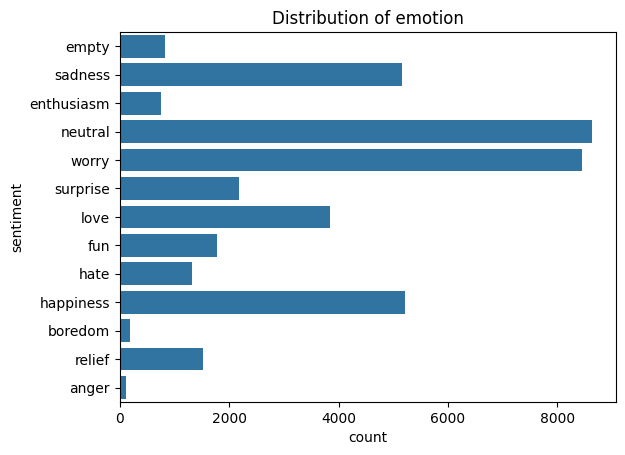

In [405]:

sns.countplot(tweet_emotions['sentiment'])
plt.title('Distribution of emotion')

plt.show()

#Text Preprocessing

In [406]:

#Text Preprocessing
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
#tokens = word_tokenize(text)

In [407]:
import nltk
import re
import html
import unicodedata

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download required resources

nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
nltk.download('punkt',force=True)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [408]:

#Text Preprocessing
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [409]:
 #Manually define punctuation characters
def remove_punctuation(text):
    punct = [ '#', '@','http','www']
    return ''.join([char for char in text if char not in punct])

# Preprocessing function
def preprocess_text(text):
    # Lowercase
    text = text.lower()

    # Remove punctuation
    text = remove_punctuation(text)

    # Tokenize (basic whitespace split)
    tokens = text.split()

    # Remove mentions, hashtags, URLs
    tokens = [word for word in tokens if not word.startswith('@') and not word.startswith('#') and not word.startswith('http') and not word.startswith('www')]

    # Basic stopwords
    stop_words = set(stopwords.words('english'))  # Needs nltk.download('stopwords') once
    tokens = [word for word in tokens if word not in stop_words and word.isalpha()]

    return " ".join(tokens)

# Apply to dataset
tweet_emotions['cleaned'] = tweet_emotions['content'].apply(preprocess_text)

In [410]:
# Remove empty or whitespace-only rows
tweet_product= tweet_emotions[tweet_emotions['cleaned'].str.strip() != '']

In [411]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
tweet_emotions['label'] = le.fit_transform(tweet_emotions['sentiment'])

X = tweet_emotions['cleaned']
y = tweet_emotions['label']

In [412]:
processed_reviews=tweet_emotions['cleaned']

In [413]:
#from sklearn.feature_extraction.text import TfidfVectorizer

In [414]:
#vectorizer = TfidfVectorizer()
#X = vectorizer.fit_transform(processed_reviews)

In [415]:
# Vectorize
#vectorizer = TfidfVectorizer()
#X = vectorizer.fit_transform(processed_reviews)
#y=tweet_emotions['label']
#labels = np.array(y)

In [416]:
#Display Cleaned Contents
tweet_emotions.head()

,tweet_id,sentiment,content,cleaned,label
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...,tiffanylue know listenin bad habit earlier sta...,2
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...,layin n bed headache,10
2,1956967696,sadness,Funeral ceremony...gloomy friday...,funeral,10
3,1956967789,enthusiasm,wants to hang out with friends SOON!,wants hang friends,3
4,1956968416,neutral,@dannycastillo We want to trade with someone w...,dannycastillo want trade someone houston one,8


In [417]:

for i,label in enumerate(le.classes_):
    print(i,":",label)

0 : anger
1 : boredom
2 : empty
3 : enthusiasm
4 : fun
5 : happiness
6 : hate
7 : love
8 : neutral
9 : relief
10 : sadness
11 : surprise
12 : worry


In [418]:
print(le.classes_)

['anger' 'boredom' 'empty' 'enthusiasm' 'fun' 'happiness' 'hate' 'love'
 'neutral' 'relief' 'sadness' 'surprise' 'worry']


In [419]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train = y_train.astype('int32')
y_test = y_test.astype('int32')

In [420]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_len = 100
tokenizer = Tokenizer(num_words=10000, oov_token="")
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post')

In [421]:

from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weights = dict(enumerate(class_weights))

In [422]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Dropout

model = Sequential([
    Embedding(input_dim=10000, output_dim=100, input_length=max_len),
    SimpleRNN(128, return_sequences=True),   # First RNN layer returns sequence
    Dropout(0.3),
    SimpleRNN(64),                           # Second RNN layer
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(4, activation='softmax')           # Final output layer for 4 classes
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [423]:
model.fit(X_train_pad, y_train, batch_size=256, epochs=5, validation_split=0.1, class_weight=class_weights)

Epoch 1/5
113/113 ━━━━━━━━━━━━━━━━━━━━ 12s 60ms/step - accuracy: 0.0197 - loss: nan - val_accuracy: 0.0134 - val_loss: nan
Epoch 2/5
113/113 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.0198 - loss: nan - val_accuracy: 0.0134 - val_loss: nan
Epoch 3/5
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.0172 - loss: nan - val_accuracy: 0.0134 - val_loss: nan
Epoch 4/5
113/113 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.0170 - loss: nan - val_accuracy: 0.0134 - val_loss: nan
Epoch 5/5
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.0200 - loss: nan - val_accuracy: 0.0134 - val_loss: nan


In [424]:

loss, accuracy = model.evaluate(X_test_pad, y_test)
print("Test Accuracy:", accuracy)

250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.0020 - loss: nan
Test Accuracy: 0.002374999923631549


In [425]:

#LSTM
from tensorflow.keras.layers import LSTM

model1 = Sequential()
model1.add(Embedding(input_dim = 20000,output_dim = 100,input_shape=(300,)))
model1.add(LSTM(50,return_sequences = True))
model1.add(LSTM(128,dropout = 0.2))
model1.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:100: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [426]:
model1 = Sequential([
    Embedding(input_dim=10000, output_dim=100, input_length=max_len),
    LSTM(128, dropout=0.2),
    Dense(4, activation='softmax')
])

model1.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


model1.fit(X_train_pad, y_train, batch_size=256, epochs=5, validation_split=0.1, class_weight=class_weights)

Epoch 1/5
113/113 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.0029 - loss: nan - val_accuracy: 0.0019 - val_loss: nan
Epoch 2/5
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.0031 - loss: nan - val_accuracy: 0.0019 - val_loss: nan
Epoch 3/5
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.0030 - loss: nan - val_accuracy: 0.0019 - val_loss: nan
Epoch 4/5
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.0030 - loss: nan - val_accuracy: 0.0019 - val_loss: nan
Epoch 5/5
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.0027 - loss: nan - val_accuracy: 0.0019 - val_loss: nan


In [427]:

loss, accuracy = model1.evaluate(X_test_pad, y_test)
print("Test Accuracy:", accuracy)

250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0020 - loss: nan
Test Accuracy: 0.002374999923631549


In [428]:
#GRU
from tensorflow.keras.layers import GRU

model2 = Sequential()
model2.add(Embedding(input_dim = 20000,output_dim = 100,input_shape=(300,)))
model2.add(GRU(128,dropout=0.2))
model2.add(Dense(1,activation = 'sigmoid'))

In [429]:

model2.compile(loss = 'binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model2.fit(X_train_pad,y_train,batch_size=256,epochs=5)

Epoch 1/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.0042 - loss: -95.1163
Epoch 2/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.0047 - loss: -246.9948
Epoch 3/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.0046 - loss: -369.1059
Epoch 4/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.0050 - loss: -488.2728
Epoch 5/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.0050 - loss: -607.9301


In [430]:
loss, accuracy = model2.evaluate(X_test_pad, y_test)
print("Test Accuracy:", accuracy)

250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0040 - loss: -700.0423
Test Accuracy: 0.003874999936670065


In [431]:
from tensorflow.keras.layers import Conv1D,Dropout,GlobalMaxPooling1D


In [432]:
model3 = Sequential()
model3.add(Embedding(input_dim = 20000,output_dim = 100,input_shape=(300,)))
model3.add(Conv1D(64,kernel_size = 3,activation='relu'))
model3.add(Dropout(0.2))
model3.add(Conv1D(64,kernel_size = 3,activation='relu'))
model3.add(Dropout(0.2))
model3.add(GlobalMaxPooling1D())
model3.add(Dense(128,activation='relu'))
model3.add(Dense(1,activation='relu'))

In [433]:
model3.compile(loss = 'binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model3.fit(X_train_pad,y_train,batch_size=256,epochs= 5)

Epoch 1/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.0039 - loss: -78.8661
Epoch 2/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.0040 - loss: -116.4480
Epoch 3/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.0041 - loss: -116.4740
Epoch 4/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.0047 - loss: -116.3368
Epoch 5/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.0047 - loss: -116.4784


In [434]:
loss, accuracy = model3.evaluate(X_test_pad, y_test)
print("Test Accuracy:", accuracy)

250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0040 - loss: -116.9480
Test Accuracy: 0.003874999936670065


In [435]:

def predict_sentiment(text, model=model3):
    cleaned_text = preprocess_text(text)
    sequence = tokenizer.texts_to_sequences([cleaned_text])
    padded = pad_sequences(sequence, maxlen=max_len, padding='post')
    pred = model.predict(padded)
    class_idx = np.argmax(pred, axis=1)[0]
    sentiment = le.inverse_transform([class_idx])[0]
    return sentiment


In [436]:
#Test Prediction
pred_tweet = "tiffanylue know listenin bad habit earlier sta..."
predicted = predict_sentiment(pred_tweet)
print(f"\nTweet: \"{pred_tweet}\"\nPrediction: {predicted} 😞")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step

Tweet: "tiffanylue know listenin bad habit earlier sta..."
Prediction: anger 😞


In [437]:
#Test Prediction
pred_tweet = "layin n bed headache"
predicted = predict_sentiment(pred_tweet)
print(f"\nTweet: \"{pred_tweet}\"\nPrediction: {predicted} 😞")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step

Tweet: "layin n bed headache"
Prediction: anger 😞


In [438]:
#Test Prediction
pred_tweet = "i'm so tired"
predicted = predict_sentiment(pred_tweet)
print(f"\nTweet: \"{pred_tweet}\"\nPrediction: {predicted} 😞")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step

Tweet: "i'm so tired"
Prediction: anger 😞
